In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
import seaborn as sns

<AxesSubplot:>

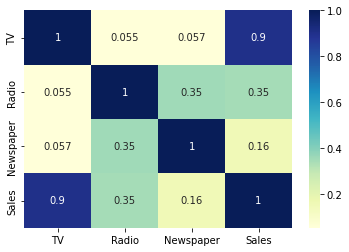

In [14]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

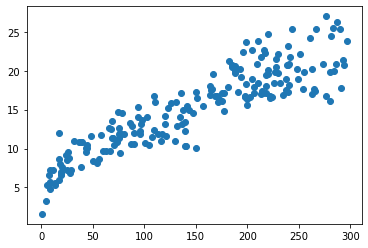

In [15]:
plt.scatter(df.TV, df.Sales)

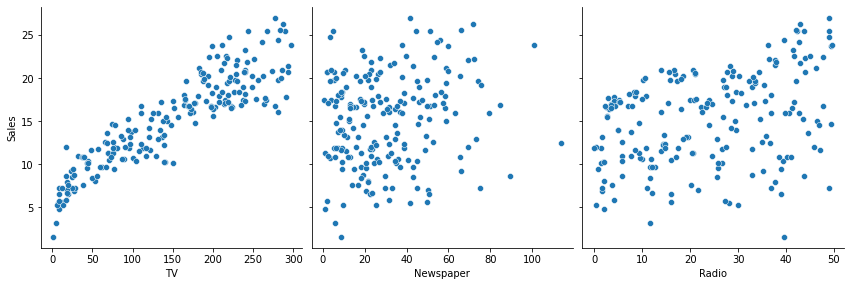

In [16]:
sns.pairplot(df, x_vars= ["TV","Newspaper","Radio"], y_vars = "Sales", height=4, aspect=1, kind="scatter")
plt.show()

In [17]:
x = df.TV
y = df.Sales

In [18]:
len(df)

200

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

In [20]:
x_test.shape

(60,)

In [21]:
x_train.shape

(140,)

In [22]:
A = random.random()
B = random.random()

In [45]:
S_xx = np.mean((x_train-np.mean(x_train))**2)
S_xy = np.mean((x_train-np.mean(x_train))*(y_train-np.mean(y_train)))

In [48]:
B = S_xy/S_xx
A = np.mean(y_train) - B*np.mean(x_train)
predicted = A + B*x_train

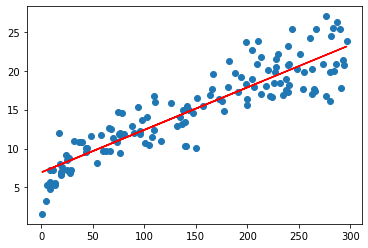

In [49]:
plt.scatter(x_train,y_train)
plt.plot(x_train,predicted, 'r')

In [58]:
def give_pred(tv):
    sales = A + B*tv
    return sales

In [60]:
give_pred(x_test)[:5]

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
Name: TV, dtype: float64

In [61]:
y_test[:5]

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [65]:
print(f"coeff are : \n\tA={A:.5f}, B={B:.5f}")

coeff are : 
	A=6.94868, B=0.05455


In [70]:
np.mean((y_test-give_pred(x_test))**2)

4.077556371826951

# Sir wala method

In [28]:
import statsmodels.api as sm

In [30]:
x_train_sm = sm.add_constant(x_train)
x_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [32]:
lr = sm.OLS(y_train, x_train_sm).fit()

Text(0, 0.5, 'Sales')

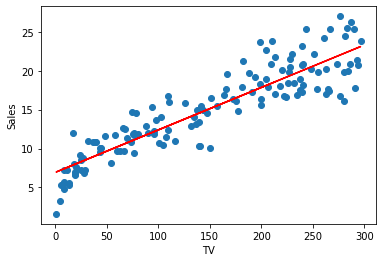

In [50]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9487+0.0545*x_train, 'r')
plt.xlabel('TV')
plt.ylabel('Sales')

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.52e-52
Time:                        16:33:22   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lr.params

const    6.948683
TV       0.054546
dtype: float64